Họ và tên: Võ Huỳnh Thanh Phương

Mã số sinh viên: 2151013072

# I. YÊU CẦU ĐỀ TÀI

Ở phần này chúng ta sẽ nộp trên LMS bài code file ipynb, yêu cầu:
- Nêu rõ nội dung ở đầu trang:
   + Lĩnh vực đang xử lý là gì (  Giao thông, y học, quan hệ xã hội,...)
   + Bài toán đang xử lý là gì (Node classification, edge prediction, graph classification, ... )
   + Sử dụng mô hình nào, tại sao
- Có đầy đủ các phần:
   + Thêm data
   + Phân tích data
   + Huấn luyện
   + Phân tích kết quả huấn luyện
   + Chạy tập test (không thuộc tập train)
- Chia từng phần theo định dạng Markdown của Colab
- Trình bảy đẹp và xóa những ô dư thừa không cần thiêt, có kèm chỉ dẫn
- Bài thuyết trình không cần làm slide mà sẽ dựa trên file ipynb của các em.

<div style="font-size:230%;
            text-align:center;
            font-weight:500;">Goodluck !
</div>
<div align="center">
<img src="https://media.tenor.com/ud8z2dEK54oAAAAj/lets-go-hype.gif" width="400px">
</div>

# II. NỘI DUNG ĐỀ TÀI

Phần này sẽ trả lời các câu hỏi:
- Đề tài sẽ dùng dataset nào?
- Đề tài nằm trong lĩnh vực gì?
- Bài toán mà đề tài muốn xử lý là gì?
- Mô hình nào được dùng để giải quyết bài toán trên?
- Lý do mô hình này được dùng?

## Thông tin cơ bản về dataset **WikipediaNetwork**
Dataset **WikipediaNetwork** trong thư viện PyTorch Geometric [[1]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.WikipediaNetwork.html) là một tập dữ liệu được giới thiệu trong bài báo "Multi-scale Attributed Node Embedding" [[2]](https://arxiv.org/abs/1909.13021).

### Thông tin chung

- **Mô tả**: gồm các mạng lưới Wikipedia, trong đó các node đại diện cho các trang web và các edge đại diện cho các liên kết. Node feature thể hiện các danh từ thông tin trong các trang Wikipedia.
- **Nhiệm vụ**: dự đoán lưu lượng truy cập trung bình hàng ngày của các trang web.

### Tham số

- **root (str)**: Thư mục gốc nơi dataset sẽ được lưu trữ.
- **name (str)**: Tên của dataset, có thể là "chameleon", "crocodile", hoặc "squirrel".
- **geom_gcn_preprocess (bool)**: Nếu được đặt là `True`, sẽ tải dữ liệu đã được tiền xử lý theo phương pháp Geom-GCN, trong đó lưu lượng truy cập hàng tháng của trang web được phân loại thành năm loại khác nhau để dự đoán. Nếu được đặt là `True`, dataset "crocodile" sẽ không khả dụng.
- **transform (callable, optional)**: Một hàm hoặc biến đổi nhận một đối tượng `torch_geometric.data.Data` và trả về một phiên bản đã được biến đổi.
- **pre_transform (callable, optional)**: Một hàm hoặc biến đổi nhận một đối tượng `torch_geometric.data.Data` và trả về một phiên bản đã được biến đổi trước khi lưu vào đĩa.
- **force_reload (bool, optional)**: Xác định xem có nên xử lý lại dataset hay không.

### Ứng dụng

Dataset này dùng để nghiên cứu về GNN trong các lĩnh vực như:
- **Phân tích mạng xã hội**: Nghiên cứu cách mà các trang web liên kết với nhau và ảnh hưởng đến lưu lượng truy cập.
- **Dự đoán lưu lượng truy cập**: Phát triển các mô hình dự đoán lưu lượng truy cập cho các trang web dựa trên các đặc trưng của chúng.
- **Phân loại nội dung**: Phân loại các trang Wikipedia vào các danh mục khác nhau dựa trên nội dung và cấu trúc của chúng.

## Lĩnh vực **khoa học dữ liệu**

Đề tài này hướng tới việc thử nghiệm các mô hình GNN

## Bài toán **node classification**


**Node classification** [[3]](https://paperswithcode.com/task/node-classification) là một bài toán về machine learning trong phân tích dữ liệu dạng graph-based, trong đó mục tiêu là gán nhãn cho các node trong đồ thị dựa trên các thuộc tính của các node và mối quan hệ giữa chúng.

**Node classification models** nhằm mục đích dự đoán các thuộc tính của node không tồn tại (được gọi là *target property*) dựa trên các thuộc tính của các node khác. Các mô hình điển hình được dùng bao gồm một họ lớn các mạng nơ-ron đồ thị. Hiệu suất mô hình có thể được đo lường bằng các tập dữ liệu chuẩn như Cora, Citeseer và Pubmed, và thường sử dụng Accuracy và F1.


## Các mô hình

### Mô hình **Graph Convolutional Networks**

#### Tổng quan về mô hình

Graph Convolutional Networks (GCN) [[4]](https://viblo.asia/p/tan-man-ve-graph-convolution-networks-phan-1-6J3Zga8A5mB) là một loại mô hình học sâu được thiết kế đặc biệt để làm việc với dữ liệu đồ thị. GCN kết hợp các đặc trưng của các đỉnh (nút) và cấu trúc của đồ thị để thực hiện các nhiệm vụ như phân loại nút, phân loại đồ thị và dự đoán liên kết.

1. **Cấu trúc và hoạt động**: GCN hoạt động bằng cách truyền thông tin qua các đỉnh và cạnh trong đồ thị. Mỗi lớp của GCN thực hiện một phép tích chập (convolution) trên đồ thị, cho phép mô hình học hỏi từ các hàng xóm của mỗi đỉnh. Điều này giúp GCN nắm bắt được thông tin cấu trúc và tương tác giữa các đối tượng trong đồ thị.

2. **Ứng dụng trong giáo dục**: Trong lĩnh vực giáo dục, GCN có thể được sử dụng để phân tích mối quan hệ giữa các tài liệu học tập, giúp tối ưu hóa nội dung giảng dạy. Nó cũng có thể hỗ trợ trong việc phát triển các hệ thống gợi ý thông minh cho học sinh, dựa trên các mối quan hệ giữa các khóa học và tài liệu học tập.

3. **Phân loại nút**: GCN rất hiệu quả trong việc phân loại các nút trong đồ thị, ví dụ như phân loại các trang Wikipedia liên quan đến giáo dục. Điều này giúp xác định các chủ đề và nội dung quan trọng, hỗ trợ giáo viên trong việc tìm kiếm tài liệu giảng dạy phù hợp.

4. **Khả năng mở rộng**: GCN có khả năng mở rộng để xử lý các đồ thị lớn, điều này rất quan trọng trong bối cảnh giáo dục, nơi mà dữ liệu có thể rất phong phú và đa dạng.

### Mô hình **Directed Graph Neural Network Convolution**

#### Giới thiệu về DirGNNConv
**DirGNNConv (Directed Graph Neural Network Convolution)** [[5]](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.DirGNNConv.html) [[6]](https://github.com/emalgorithm/directed-graph-neural-network) là một **lớp convolution trên đồ thị có hướng** (*Directed Graphs*), giúp khai thác cả thông tin cấu trúc đồ thị và phổ của ma trận kề có hướng.

Mô hình này thuộc nhóm **Graph Neural Networks (GNNs)**, được thiết kế để xử lý đồ thị mà **hướng của cạnh đóng vai trò quan trọng**, chẳng hạn như:
- **Mạng xã hội** (người theo dõi nhau trên Twitter, Instagram)  
- **Mạng trích dẫn** (các bài báo khoa học trích dẫn nhau)  
- **Mạng web** (các liên kết giữa các trang web)

#### Cơ chế hoạt động của DirGNNConv  
Khác với **GCN truyền thống**, mô hình **DirGNNConv** sử dụng **các đặc trưng phổ của đồ thị có hướng** để cải thiện khả năng học:  

🔹 **Ma trận kề có hướng**  
- Trong đồ thị có hướng, **hướng của cạnh mang thông tin quan trọng**. DirGNNConv khai thác điều này để xác định **mối quan hệ giữa các nút**.
- Với mỗi nút \( v \), thay vì chỉ lấy thông tin từ lân cận, DirGNNConv cũng phân biệt giữa **cạnh đi vào** và **cạnh đi ra**.  

🔹 **Truyền thông tin theo hướng**  
- DirGNNConv sử dụng **hai ma trận trọng số khác nhau** cho cạnh đi vào và cạnh đi ra để giúp mô hình hiểu được sự khác biệt về cấu trúc của đồ thị có hướng.  

🔹 **Biến đổi phổ của đồ thị**  
- DirGNNConv dựa vào **phổ của đồ thị có hướng**, giúp mô hình học được **các biểu diễn toàn cục** thay vì chỉ lan truyền thông tin qua cạnh như GCN.  
- Điều này giúp mô hình hoạt động tốt hơn trên đồ thị **heterophily** (các nút kết nối có thể có nhãn khác nhau).


#### **Lý do chọn DirGNNConv cho WikipediaNetwork (Squirrel)**  

##### **1. Đặc điểm của dataset WikipediaNetwork (Squirrel)**  
Dataset **Squirrel** thuộc nhóm **WikipediaNetwork**, chứa các đồ thị được xây dựng từ liên kết giữa các trang Wikipedia.

🔹 **Là đồ thị có hướng**  
- Các trang Wikipedia liên kết với nhau theo một chiều, tạo ra **cấu trúc có hướng**.  
- Điều này khiến các mô hình GCN truyền thống khó khai thác được hết thông tin.

🔹 **Có tính heterophily [[7]](https://en.wikipedia.org/wiki/Heterophily) cao**  
- Các nút kết nối với nhau có thể **thuộc nhãn khác nhau**, không tuân theo giả định **homophily** (các nút kết nối có xu hướng có cùng nhãn) [[8]](https://en.wikipedia.org/wiki/Network_homophily).  
- Các mô hình GCN truyền thống như **GCN, GAT** hoạt động kém trên loại đồ thị này.

🔹 **Đồ thị có cấu trúc phức tạp**  
- Squirrel có nhiều cạnh có hướng, với **mật độ liên kết cao**, đòi hỏi mô hình có thể tận dụng tốt cả **cấu trúc cục bộ lẫn toàn cục**.

##### **2. Vì sao DirGNNConv phù hợp với Squirrel?**  

✅ **Hỗ trợ đồ thị có hướng**  
- DirGNNConv được thiết kế để xử lý **hướng của cạnh**, giúp mô hình học được **thông tin quan trọng từ liên kết giữa các trang Wikipedia**.  

✅ **Giải quyết vấn đề heterophily**  
- Thay vì giả định các nút kết nối có cùng nhãn (homophily), DirGNNConv sử dụng **phổ của đồ thị** để học **các đặc trưng toàn cục**, giúp phân loại nút chính xác hơn.  

✅ **Giảm over-smoothing**  
- Các GNN truyền thống như GCN có thể gặp vấn đề **over-smoothing** (tất cả các nút có biểu diễn giống nhau sau nhiều lớp), nhưng DirGNNConv sử dụng **các phép biến đổi phổ**, giúp mô hình giữ được **sự khác biệt giữa các nút**.  

✅ **Tận dụng tốt đặc trưng của dữ liệu**  
- WikipediaNetwork (Squirrel) có các đặc trưng đa dạng, và DirGNNConv có khả năng khai thác các đặc trưng này một cách hiệu quả hơn so với các mô hình GCN truyền thống.

### **So sánh DirGNNConv với các mô hình khác trên Squirrel**  [[9]](https://paperswithcode.com/sota/node-classification-on-squirrel)

| **Mô hình**   | **Cơ chế chính** | **Hỗ trợ đồ thị có hướng?** | **Xử lý heterophily?** | **Tốt cho Squirrel?** |
|--------------|----------------|------------------------|-------------------|----------------|
| **GCN**      | Lan truyền qua nút kề gần nhất | ❌ Không | ❌ Kém hiệu quả | ❌ |
| **GAT**      | Attention giữa các nút lân cận | ❌ Không | ❌ Trung bình | ❌ |
| **DirGNNConv** | Dùng phổ đồ thị có hướng | ✅ Có | ✅ Rất tốt | ✅ ✔ |

### Giải thích

**WikipediaNetwork (bao gồm Squirrel)** thuộc loại **homogeneous graph** theo cách định nghĩa của **PyTorch Geometric (PyG)**, tức là tất cả các nút và cạnh thuộc cùng một loại.  

Tuy nhiên, trong bối cảnh **học trên đồ thị (Graph Learning)**, có sự phân biệt giữa:  
- **Homogeneous graph (đồng nhất về loại nút và cạnh)** → WikipediaNetwork là homogeneous theo nghĩa này.  
- **Homophilic vs. Heterophilic graph (đồng hướng vs. dị hướng về quan hệ nút)** → WikipediaNetwork (Squirrel) là **heterophilic graph** (dị hướng), nghĩa là các nút có xu hướng kết nối với những nút có nhãn khác.  

---

### **1. Squirrel là Heterophilic Graph, Không phải Homophilic Graph**
- Trong một **homophilic graph**, các nút liên kết với nhau thường có cùng nhãn (ví dụ: mạng xã hội, nơi bạn bè có chung sở thích).  
- Trong **Squirrel**, các nút thường liên kết với các nút KHÁC NHÃN, làm cho các mô hình GNN truyền thống gặp khó khăn trong việc học biểu diễn đặc trưng.  
- 📌 **Squirrel có tỷ lệ homophily thấp (~0.22), nghĩa là phần lớn các nút kết nối với các nút khác nhãn.**  

---

### **2. Tại sao DirGNNConv phù hợp với Squirrel?**
Mặc dù WikipediaNetwork là **homogeneous** theo PyG, nhưng do đặc tính **heterophily**, Squirrel yêu cầu một mô hình có thể:  
✅ Học từ đồ thị có hướng.  
✅ Giảm ảnh hưởng của các nút không liên quan.  
✅ Giữ lại thông tin của nút gốc.  

📈 **DirGNNConv giúp giải quyết những vấn đề này bằng cách xử lý thông tin theo hướng và kiểm soát mức độ lan truyền thông tin giữa các nút.**

# TẢI THƯ VIỆN PYTORCHGEOMETRIC VÀ NETWORKX



In [ ]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

2.6.0+cu124
12.4
Python 3.11.11
Wed Mar 26 21:35:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+---------------

In [ ]:
import torch
pytorch_version = f"torch-{torch.__version__}.html"
#pytorch_version = "torch-2.5.1+cu124.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric
!pip install networkx

Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 88.4 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.4 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.1 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00


# THÊM DATASET

Bạn có thể sử dụng dataset "chameleon", "crocodile", "squirrel". Trong đó "chameleon" là dataset có kích thước nhỏ nhất, "crocodile" có kích thước vừa và "squirrel" có kích thước lớn nhất. Đề tài này sẽ dùng dataset "squirrel".

In [ ]:
from torch_geometric.datasets import WikipediaNetwork

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_scatter_cuda.so: undefined symbol: _ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_St8optionalIN3c1017basic_string_viewIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_basis_cuda.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_spmm_cuda.so: undefined sy

In [ ]:
dataset_1 = WikipediaNetwork(root=".",name="squirrel")
data_1 = dataset_1[0]
dataset_1

Processing...
Done!


WikipediaNetwork()

In [ ]:
dataset_2 = WikipediaNetwork(root=".",name="squirrel")
data_2 = dataset_2[0]
dataset_2

WikipediaNetwork()

# THÊM CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.nn import DirGNNConv
import torch.nn.functional as F
from sklearn.manifold import TSNE
import warnings
import seaborn as sns

# KHÁM PHÁ DATASET

In [ ]:
print("Dataset type: ", type(dataset_1))
print("Dataset features: ", dataset_1.num_features)
print("Dataset target: ", dataset_1.num_classes)
print("Dataset length: ", dataset_1.len)
print("Dataset sample: ", data_1)
print("Sample  nodes: ", data_1.num_nodes)
print("Sample  edges: ", data_1.num_edges)

Dataset type:  <class 'torch_geometric.datasets.wikipedia_network.WikipediaNetwork'>
Dataset features:  2089
Dataset target:  5
Dataset length:  <bound method InMemoryDataset.len of WikipediaNetwork()>
Dataset sample:  Data(x=[5201, 2089], edge_index=[2, 217073], y=[5201], train_mask=[5201, 10], val_mask=[5201, 10], test_mask=[5201, 10])
Sample  nodes:  5201
Sample  edges:  217073


In [ ]:
data_1.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data_1.edge_index.t()

tensor([[   0,  514],
        [   0,  613],
        [   0,  633],
        ...,
        [5200, 2246],
        [5200, 5062],
        [5200, 5156]])

In [ ]:
data_1.y

tensor([1, 3, 0,  ..., 0, 1, 1])

In [ ]:
dataset_1.y[:50]

tensor([1, 3, 0, 0, 4, 0, 2, 0, 0, 2, 1, 2, 4, 3, 0, 0, 4, 1, 1, 1, 0, 2, 1, 2,
        1, 2, 2, 0, 1, 3, 0, 4, 0, 0, 1, 0, 1, 3, 4, 4, 4, 1, 4, 3, 2, 1, 4, 0,
        0, 2])

In [10]:
import random
i = random.randint(0, 9)
print(i)

0


In [ ]:
dataset_1.train_mask

tensor([[False,  True, False,  ...,  True, False, False],
        [False, False, False,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True, False],
        ...,
        [False, False,  True,  ...,  True,  True,  True],
        [False, False,  True,  ..., False,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True]])

In [ ]:
dataset_1.train_mask=dataset_1.train_mask[:, i]
dataset_1.train_mask

tensor([False, False,  True,  ..., False, False,  True])

In [ ]:
dataset_1.test_mask

tensor([[ True, False, False,  ..., False, False,  True],
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False,  True, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False]])

In [ ]:
dataset_1.test_mask=dataset_1.test_mask[:, i]
dataset_1.test_mask

tensor([ True, False, False,  ..., False, False, False])

In [ ]:
dataset_1.val_mask

tensor([[False, False,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False, False, False],
        [False,  True, False,  ...,  True, False,  True],
        ...,
        [ True,  True, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False]])

In [ ]:
dataset_1.val_mask=dataset_1.val_mask[:, i]
dataset_1.val_mask

tensor([False,  True, False,  ...,  True,  True, False])

In [ ]:
data_1["train_mask"]

tensor([[False,  True, False,  ...,  True, False, False],
        [False, False, False,  ..., False,  True,  True],
        [ True, False,  True,  ..., False,  True, False],
        ...,
        [False, False,  True,  ...,  True,  True,  True],
        [False, False,  True,  ..., False,  True,  True],
        [ True,  True, False,  ...,  True,  True,  True]])

In [ ]:
data_1["test_mask"]

tensor([[ True, False, False,  ..., False, False,  True],
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False,  True, False,  ...,  True, False, False],
        [False, False, False,  ..., False, False, False]])

In [ ]:
data_1["val_mask"]

tensor([[False, False,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False, False, False],
        [False,  True, False,  ...,  True, False,  True],
        ...,
        [ True,  True, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False]])

In [ ]:
dataset_2.train_mask=dataset_2.train_mask[:, i]
dataset_2.test_mask=dataset_2.test_mask[:, i]
dataset_2.val_mask=dataset_2.val_mask[:, i]

# TRỰC QUAN HÓA DỮ LIỆU BẰNG CÁC HÀM VẼ

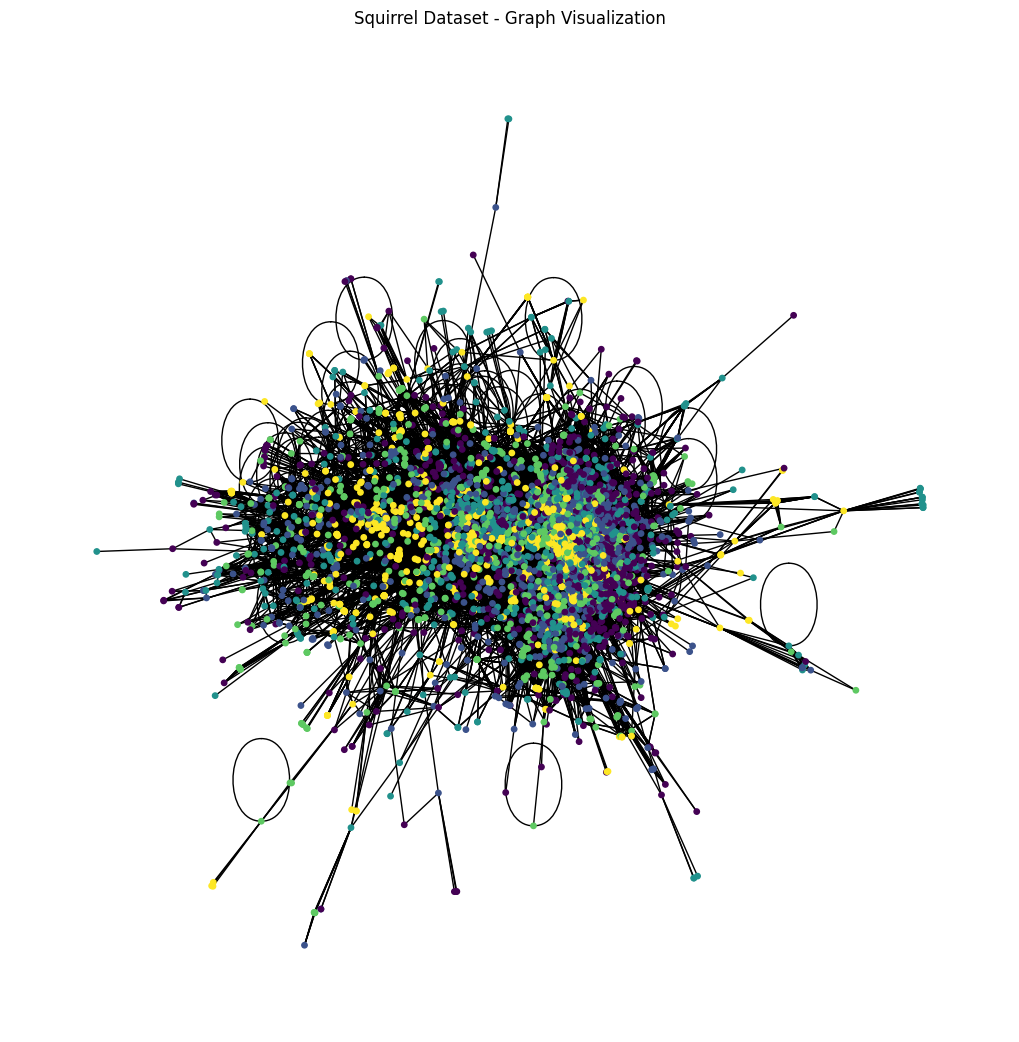

In [ ]:
plt.figure(figsize=(10, 10))
data_1_nx = torch_geometric.utils.to_networkx(data_1, to_undirected=True)
nx.draw(data_1_nx, node_size=15, node_color=dataset_1.y)
plt.title("Squirrel Dataset - Graph Visualization")
plt.show()

# MODEL **GCN**

## TẠO GCN

tạo mảng GCN là class con của torch.nn.Module để làm Node Prediction với 2 layers:
- Mảng Conv với size là số feaures và số hidden layers
- Mảng Conv với cùng số hidden layers và số classes

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_layers):
        super().__init__()
        torch.manual_seed(0000000)
        self.conv1 = GCNConv(dataset_1.num_features, hidden_layers)
        self.conv2 = GCNConv(hidden_layers, dataset_1.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model_gcn = GCN(hidden_layers=32)
print(model_gcn)
print("Number of parameters: ", sum(p.numel() for p in model_gcn.parameters()))

GCN(
  (conv1): GCNConv(2089, 32)
  (conv2): GCNConv(32, 5)
)
Number of parameters:  67045


Tạo hàm feed forward với các bước:
- đầu vô là các node và các cạnh
- kết quả chạy qua layers đầu tiên
- theo bài nghiên cứu, sử dụng activation function ReLu
- dropout ngẫu nhiên các training node
- chạy các node còn lại qua layer thứ 2
- trả về các Node sau khi được update

In [ ]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color.detach().cpu().numpy(), cmap="Set2")
    plt.show()

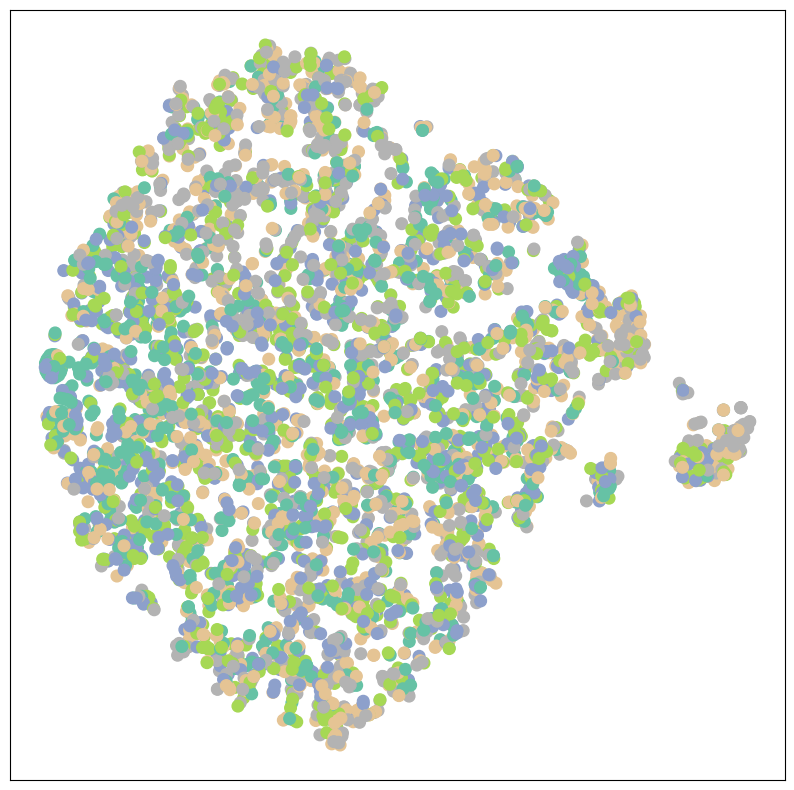

In [ ]:
model_gcn.eval()
out_gcn = model_gcn(dataset_1.x, dataset_1.edge_index)
visualize(out_gcn, color=dataset_1.y)

## HUẤN LUYỆN

In [ ]:
warnings.filterwarnings("ignore")

loss_fn_gcn=torch.nn.CrossEntropyLoss()
optimizer_gcn=torch.optim.Adam(model_gcn.parameters(), lr=0.01, weight_decay=5e-4)

device_gcn = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_gcn = model_gcn.to(device_gcn)
dataset_1 = dataset_1.to(device_gcn)

In [ ]:
def train_gcn():
      model_gcn.train()
      optimizer_gcn.zero_grad()
      pred=model_gcn(dataset_1.x, dataset_1.edge_index)
      loss=loss_fn_gcn(pred[dataset_1.train_mask], dataset_1.y[dataset_1.train_mask])
      out = model_gcn(dataset_1.x, dataset_1.edge_index)
      loss.backward()
      optimizer_gcn.step()
      return loss

print("Bắt đầu huấn luyện:")
losses_gcn=[]
for epoch in range(2001):
    loss = train_gcn()
    losses_gcn.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch: {epoch+1}, Loss: {loss}')

Bắt đầu huấn luyện:
Epoch: 1, Loss: 1.6387040615081787
Epoch: 101, Loss: 0.765987753868103
Epoch: 201, Loss: 0.6591485142707825
Epoch: 301, Loss: 0.5943636894226074
Epoch: 401, Loss: 0.5459698438644409
Epoch: 501, Loss: 0.5228788256645203
Epoch: 601, Loss: 0.5132068395614624
Epoch: 701, Loss: 0.5237776637077332
Epoch: 801, Loss: 0.48936477303504944
Epoch: 901, Loss: 0.4877481758594513
Epoch: 1001, Loss: 0.472726434469223
Epoch: 1101, Loss: 0.5026007294654846
Epoch: 1201, Loss: 0.5220082402229309
Epoch: 1301, Loss: 0.4935671389102936
Epoch: 1401, Loss: 0.5067894458770752
Epoch: 1501, Loss: 0.4629270136356354
Epoch: 1601, Loss: 0.45846205949783325
Epoch: 1701, Loss: 0.4319049119949341
Epoch: 1801, Loss: 0.4273097813129425
Epoch: 1901, Loss: 0.44242414832115173
Epoch: 2001, Loss: 0.44172659516334534


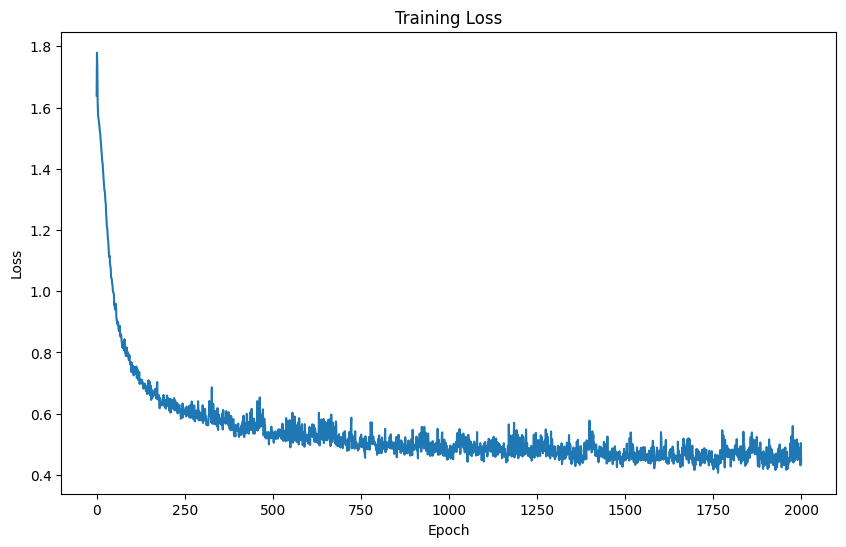

In [ ]:
losses_float_gcn=[float(loss.cpu().detach().numpy()) for loss in losses_gcn]
loss_indices_gcn=[i for i, l in enumerate(losses_float_gcn)]

plt.figure(figsize=(10,6))
sns.lineplot(x=loss_indices_gcn, y=losses_float_gcn)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## INFERENCING

In [ ]:
def test_gcn():
  model_gcn.eval()
  pred=model_gcn(dataset_1.x,dataset_1.edge_index)
  out=pred.argmax(dim=1)
  test_correct=out[dataset_1.test_mask] == dataset_1.y[dataset_1.test_mask]
  test_accuracy=int(test_correct.sum()) / int(dataset_1.test_mask.sum())

  return test_accuracy

In [ ]:
accuracy_gcn = test_gcn()
print("Test accuracy: ", accuracy_gcn*100, "%")

Test accuracy:  20.7492795389049 %


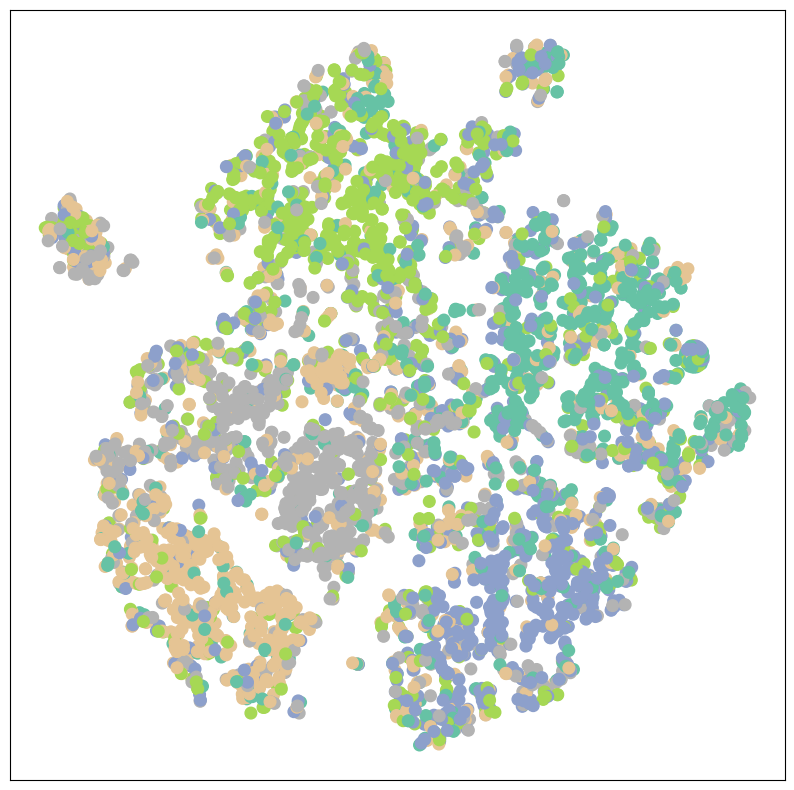

In [ ]:
model_gcn.eval()
out_gcn = model_gcn(dataset_1.x, dataset_1.edge_index)
visualize(out_gcn, color=dataset_1.y)

# MODEL **DirGNN**

## TẠO DirGNN

In [ ]:
class DirGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(DirGNN, self).__init__()
        self.conv1 = DirGNNConv(GCNConv(in_channels, hidden_channels), alpha=0.5)
        self.conv2 = DirGNNConv(GCNConv(hidden_channels, out_channels), alpha=0.5)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


model_dirgnn = DirGNN(in_channels=dataset_2.num_features, hidden_channels=64, out_channels=dataset_2.num_classes)
print(model_dirgnn)
print("Number of parameters: ", sum(p.numel() for p in model_dirgnn.parameters()))

DirGNN(
  (conv1): DirGNNConv(GCNConv(2089, 64), alpha=0.5)
  (conv2): DirGNNConv(GCNConv(64, 5), alpha=0.5)
)
Number of parameters:  402255


In [ ]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color.detach().cpu().numpy(), cmap="Set2")
    plt.show()

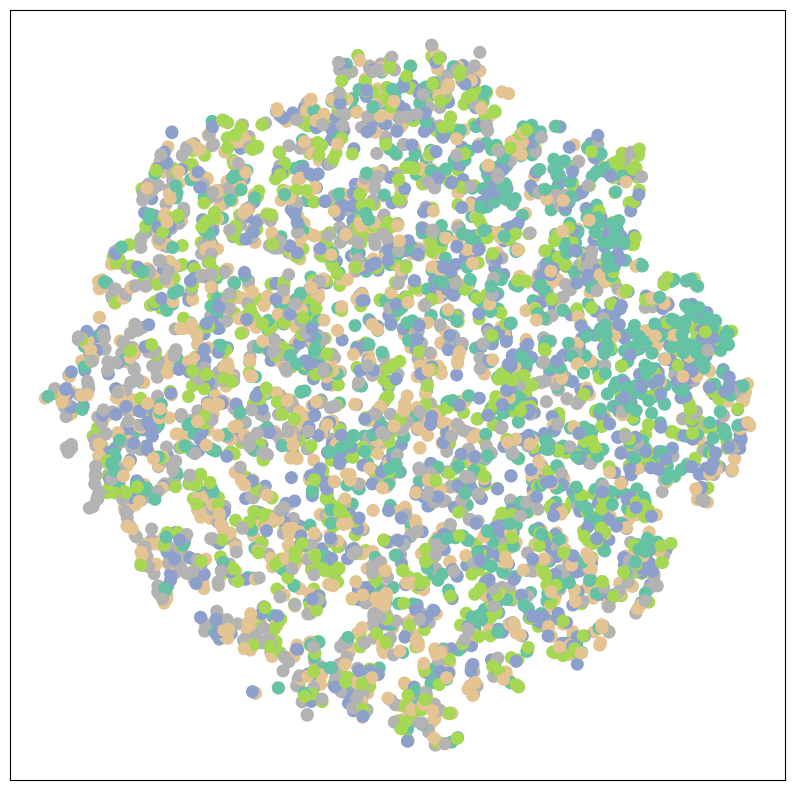

In [ ]:
model_dirgnn.eval()
out_dirgnn = model_dirgnn(dataset_2.x, dataset_2.edge_index)
visualize(out_dirgnn, color=dataset_2.y)

## HUẤN LUYỆN

In [ ]:
warnings.filterwarnings("ignore")

loss_fn_dirgnn=torch.nn.CrossEntropyLoss()
optimizer_dirgnn=torch.optim.Adam(model_dirgnn.parameters(), lr=0.01, weight_decay=5e-4)

device_dirgnn = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_dirgnn = model_dirgnn.to(device_dirgnn)
dataset_2 = dataset_2.to(device_dirgnn)

In [ ]:
def train_dirgnn():
      model_dirgnn.train()
      optimizer_dirgnn.zero_grad()
      pred=model_dirgnn(dataset_2.x, dataset_2.edge_index)
      loss=loss_fn_dirgnn(pred[dataset_2.train_mask], dataset_2.y[dataset_2.train_mask])
      out = model_dirgnn(dataset_2.x, dataset_2.edge_index)
      loss.backward()
      optimizer_dirgnn.step()
      return loss

print("Bat dau huan luyen")
losses_dirgnn=[]
for epoch in range(2001):
    loss = train_dirgnn()
    losses_dirgnn.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch: {epoch+1}, Loss: {loss}')

Bat dau huan luyen
Epoch: 1, Loss: 1.6143823862075806
Epoch: 101, Loss: 0.07434434443712234
Epoch: 201, Loss: 0.05477461963891983
Epoch: 301, Loss: 0.05062994733452797
Epoch: 401, Loss: 0.047767795622348785
Epoch: 501, Loss: 0.046109411865472794
Epoch: 601, Loss: 0.04443453252315521
Epoch: 701, Loss: 0.04356958344578743
Epoch: 801, Loss: 0.04322336986660957
Epoch: 901, Loss: 0.04314088821411133
Epoch: 1001, Loss: 0.04287319630384445
Epoch: 1101, Loss: 0.04273416846990585
Epoch: 1201, Loss: 0.042606282979249954
Epoch: 1301, Loss: 0.04261745512485504
Epoch: 1401, Loss: 0.04245055094361305
Epoch: 1501, Loss: 0.04218891263008118
Epoch: 1601, Loss: 0.042048871517181396
Epoch: 1701, Loss: 0.041998475790023804
Epoch: 1801, Loss: 0.042044878005981445
Epoch: 1901, Loss: 0.04252410680055618
Epoch: 2001, Loss: 0.04184023663401604


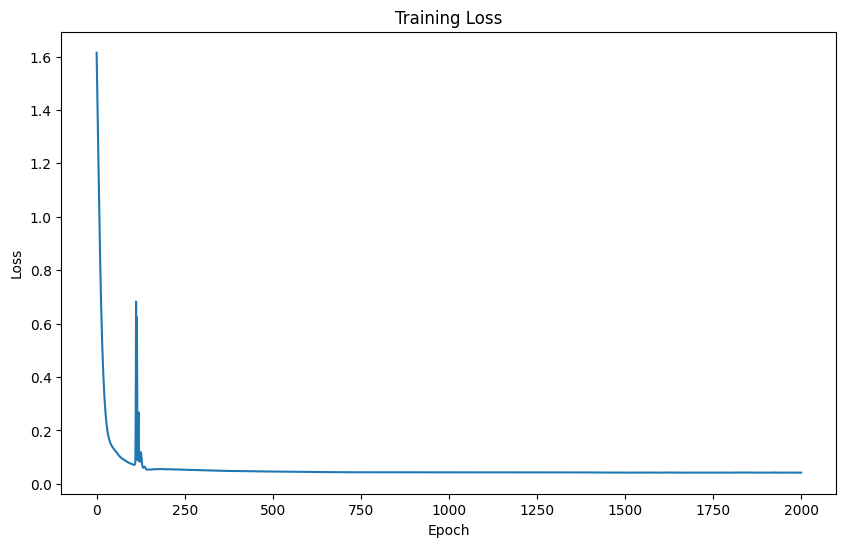

In [ ]:
losses_float_dirgnn=[float(loss.cpu().detach().numpy()) for loss in losses_dirgnn]
loss_indices_dirgnn=[i for i, l in enumerate(losses_float_dirgnn)]

plt.figure(figsize=(10,6))
sns.lineplot(x=loss_indices_dirgnn, y=losses_float_dirgnn)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## INFERENCING

In [ ]:
def test_dirgnn():
  model_dirgnn.eval()
  pred=model_dirgnn(dataset_2.x,dataset_2.edge_index)
  out=pred.argmax(dim=1)
  test_correct=out[dataset_2.test_mask] == dataset_2.y[dataset_2.test_mask]
  test_accuracy=int(test_correct.sum()) / int(dataset_2.test_mask.sum())

  return test_accuracy

In [ ]:
accuracy_dirgnn = test_dirgnn()
print("Test accuracy: ", accuracy_dirgnn*100, "%")

Test accuracy:  37.656099903938525 %


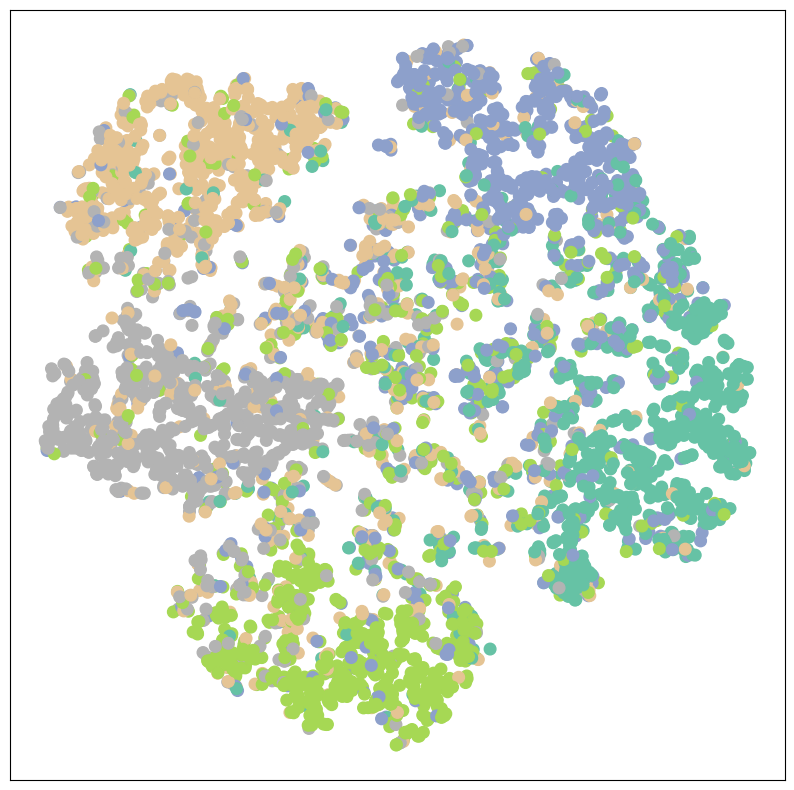

In [ ]:
model_dirgnn.eval()
out_dirgnn = model_dirgnn(dataset_2.x, dataset_2.edge_index)
visualize(out_dirgnn, color=dataset_2.y)

# THAM KHẢO

1. [torch\_geometric.datasets.WikipediaNetwork - pytorch\_geometric documentation](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.WikipediaNetwork.html)

2. [Multi-scale Attributed Node Embedding](https://arxiv.org/abs/1909.13021)

3. [Node Classification](https://paperswithcode.com/task/node-classification)

4. [Tản mạn về Graph Convolution Networks (Phần 1)](https://viblo.asia/p/tan-man-ve-graph-convolution-networks-phan-1-6J3Zga8A5mB)

5. [conv.DirGNNConv](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.DirGNNConv.html)

6. [Dir-GNN: Graph Neural Networks for Directed Graphs](https://github.com/emalgorithm/directed-graph-neural-network)

7. [Heterophily](https://en.wikipedia.org/wiki/Heterophily)

8. [Network homophily](https://en.wikipedia.org/wiki/Network_homophily)

9. [Node Classification on Squirrel](https://paperswithcode.com/sota/node-classification-on-squirrel)